ПОСТРОЕНИЕ ДЕРЕВА РЕШЕНИЙ ДЛЯ ПРЕДСКАЗАНИЯ РЕЗУЛЬТАТОВ ТЕННИСНЫХ МАТЧЕЙ
Загружено 95367 строк, 31 признаков

Целевая переменная: RESULT
Удаляем колонки: ['match_idx', 'tourney_date', 'PLAYER_1', 'PLAYER_2']
Размерность признаков X: (95367, 26)
Размерность целевой переменной y: (95367,)

РАЗДЕЛЕНИЕ НА TRAIN/TEST
--------------------------------------------------------------------------------
Train размер: 76293 (80.0%)
Test размер: 19074 (20.0%)

ДОЛЯ ПРАВИЛЬНЫХ ОТВЕТОВ (ACCURACY):
Train Accuracy: 0.6651 (66.51%)
Test Accuracy:  0.6605 (66.05%)

ROC-AUC Score: 0.7228


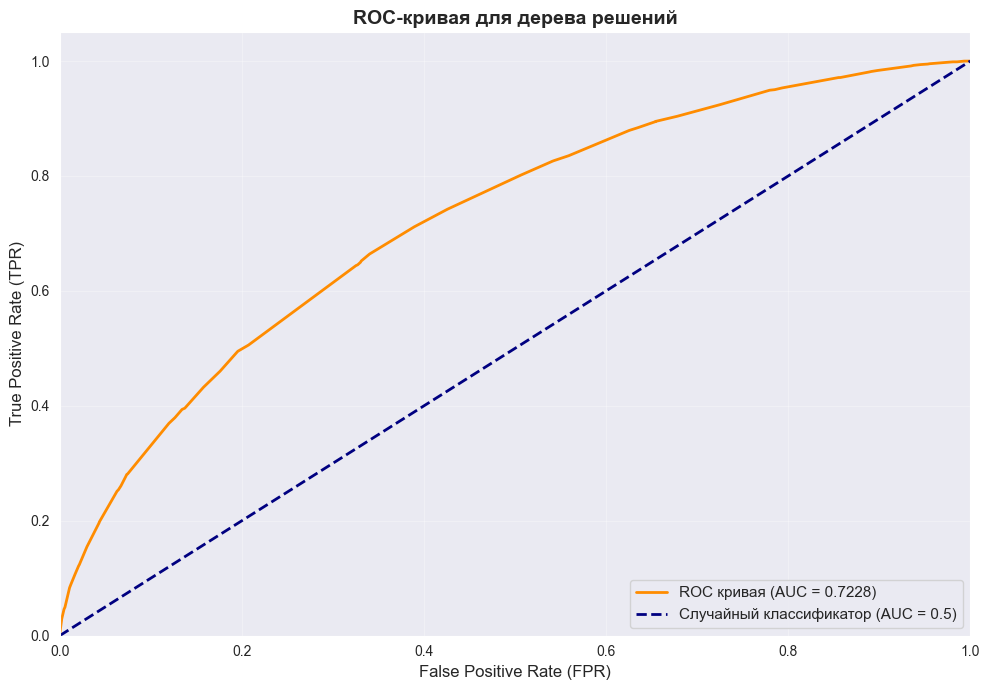

ROC-AUC Score: 0.7228


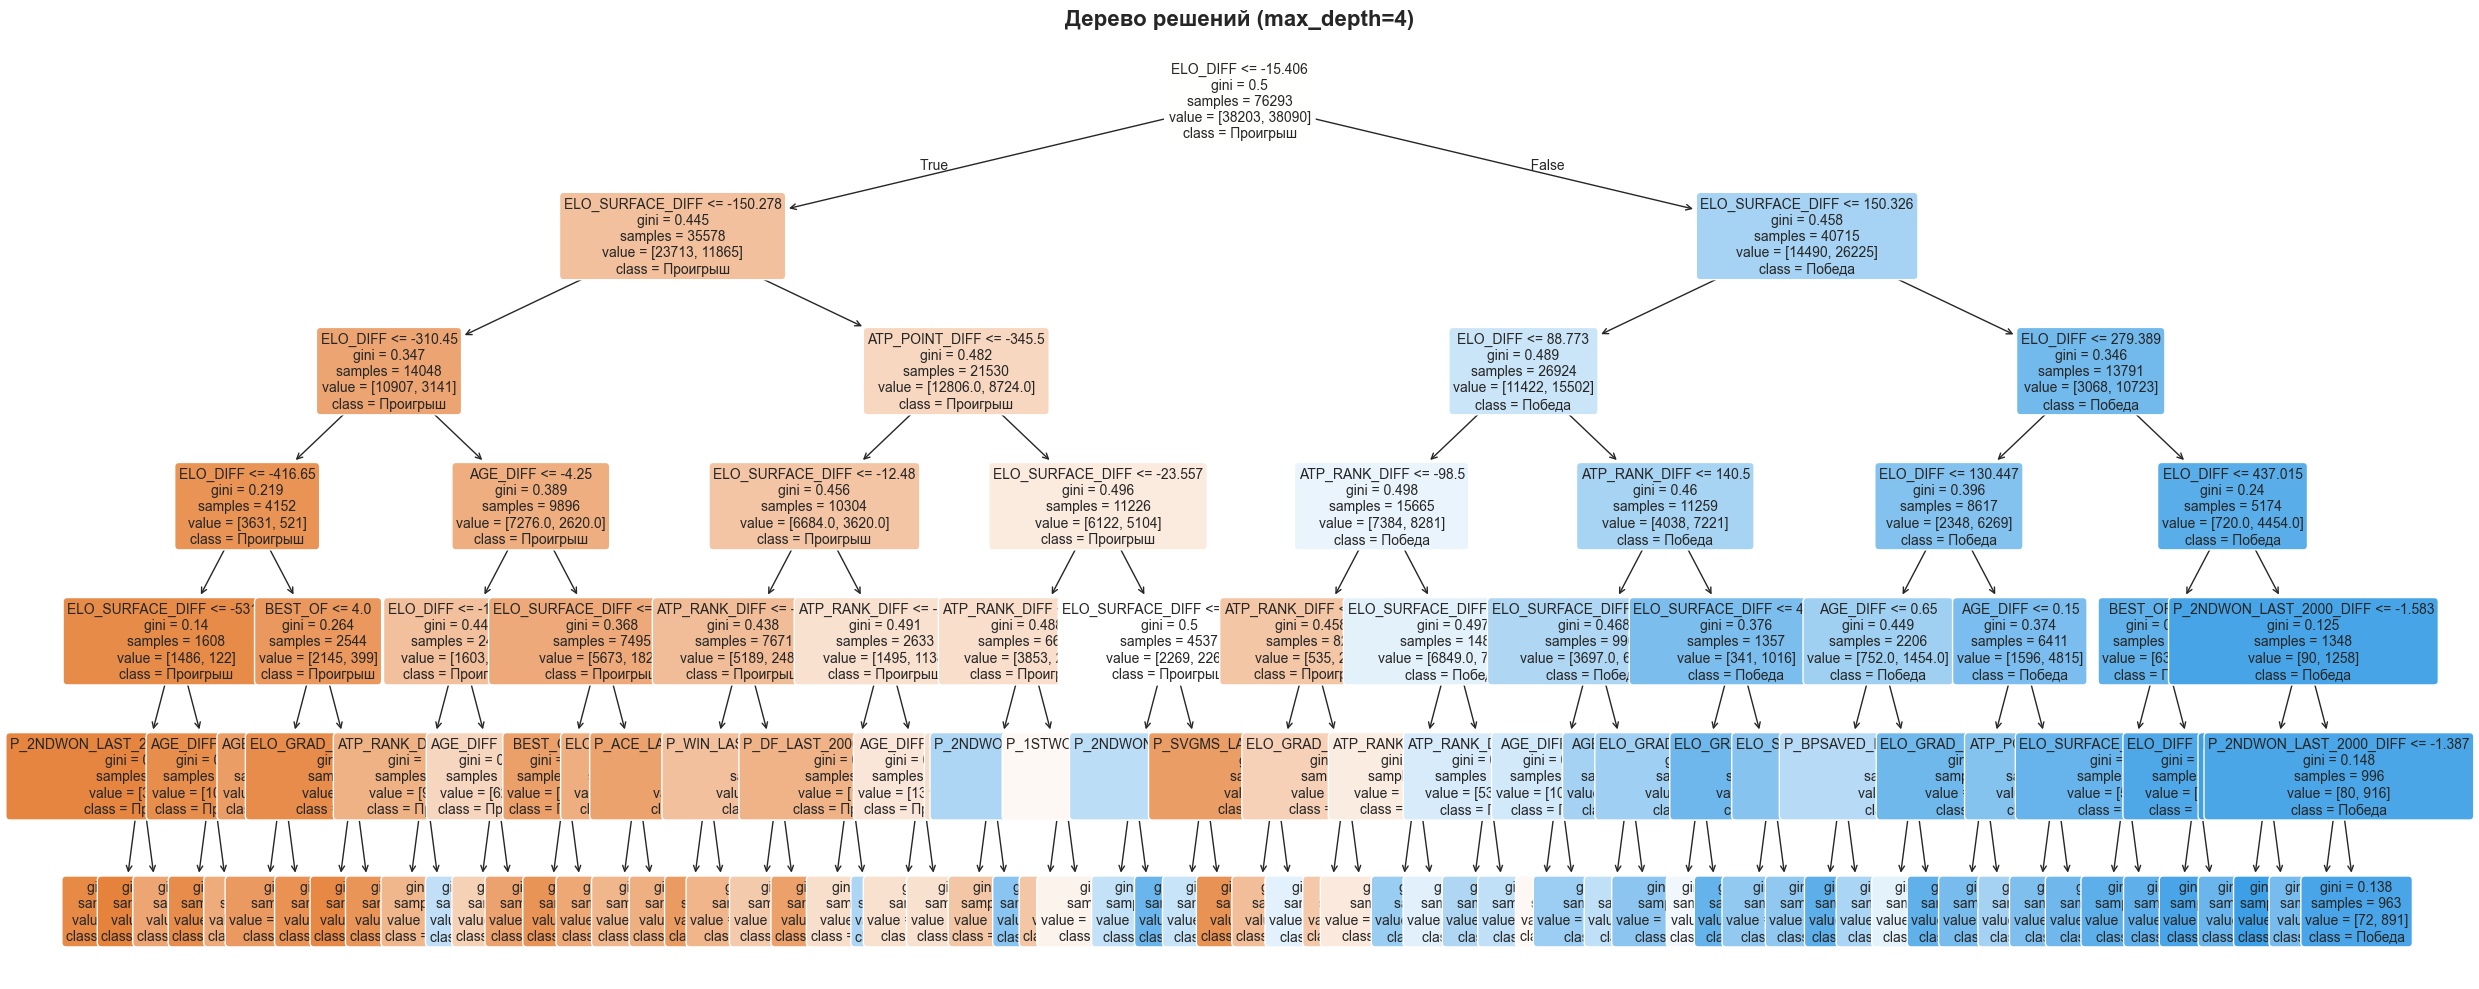

In [13]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, roc_curve, roc_auc_score)
import matplotlib.pyplot as plt


print("ПОСТРОЕНИЕ ДЕРЕВА РЕШЕНИЙ ДЛЯ ПРЕДСКАЗАНИЯ РЕЗУЛЬТАТОВ ТЕННИСНЫХ МАТЧЕЙ")
print("=" * 80)

df = pd.read_csv("norm_dataframe.csv", index_col=0)
print(f"Загружено {len(df)} строк, {len(df.columns)} признаков")


target = "RESULT"
print(f"\nЦелевая переменная: {target}")

drop_cols = ["match_idx", "tourney_date", "PLAYER_1", "PLAYER_2"]
drop_cols = [col for col in drop_cols if col in df.columns]
print(f"Удаляем колонки: {drop_cols}")

df_clean = df.drop(columns=drop_cols)

X = df_clean.drop(columns=[target])
y = df_clean[target]

print(f"Размерность признаков X: {X.shape}")
print(f"Размерность целевой переменной y: {y.shape}")


print("\nРАЗДЕЛЕНИЕ НА TRAIN/TEST")
print("-" * 80)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train размер: {X_train.shape[0]} ({X_train.shape[0] / len(X) * 100:.1f}%)")
print(f"Test размер: {X_test.shape[0]} ({X_test.shape[0] / len(X) * 100:.1f}%)")


tree = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)

tree.fit(X_train, y_train)


y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

y_test_proba = tree.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n{'=' * 40}")
print(f"ДОЛЯ ПРАВИЛЬНЫХ ОТВЕТОВ (ACCURACY):")
print(f"{'=' * 40}")
print(f"Train Accuracy: {train_accuracy:.4f} ({train_accuracy * 100:.2f}%)")
print(f"Test Accuracy:  {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")
print(f"{'=' * 40}")


roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Случайный классификатор (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая для дерева решений', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(25, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Проигрыш", "Победа"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Дерево решений", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

